In [11]:
## 1. Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

    Income  Age  Experience  Married.Single  House_Ownership  Car_Ownership  \
0  1303834   23           3               0                1              0   
1  7574516   40          10               0                1              0   
2  3991815   66           4               1                1              0   
3  6256451   41           2               0                1              1   
4  5768871   47          11               0                1              0   

            Profession           STATE  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  \
0  Mechanical_engineer  Madhya_Pradesh                3                 13   
1   Software_Developer     Maharashtra                9                 13   
2     Technical_writer          Kerala                4                 10   
3   Software_Developer          Odisha                2                 12   
4        Civil_servant      Tamil_Nadu                3                 14   

   ...  ProfessionScientist ProfessionSecretary Professi

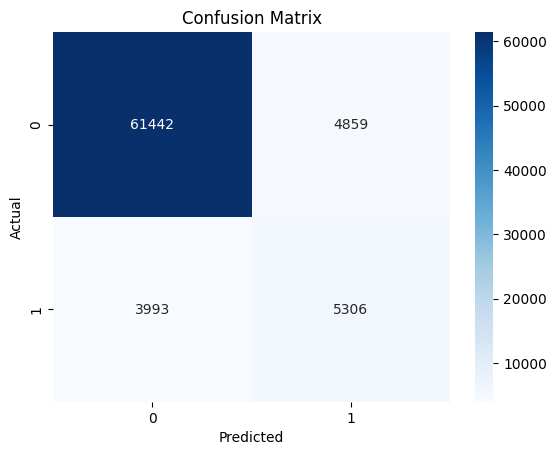

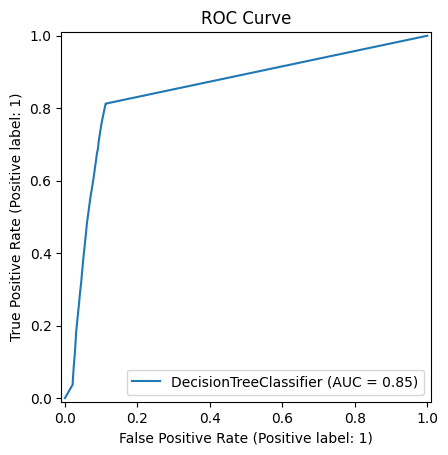

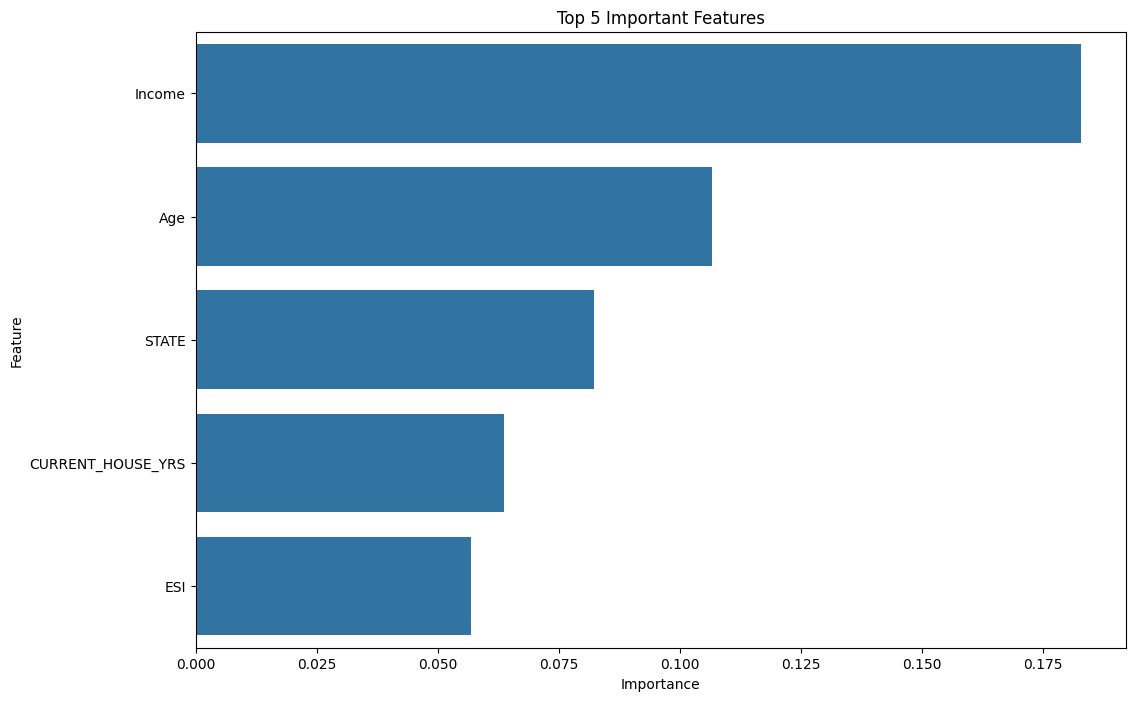

Cross-Validation Accuracy: 0.88


In [8]:
## 2. Load Dataset
data = pd.read_csv('cleanLoanData.csv')
print(data.head())

## 3. Preprocessing
# Checking for missing values
print(data.isnull().sum())

# Encoding 'STATE' feature using Label Encoding
label_encoder = LabelEncoder()
data['STATE'] = label_encoder.fit_transform(data['STATE'])

# Decision Tree - Iteration 1

# Encoding other categorical variables
data = pd.get_dummies(data, drop_first=True)

# Splitting Features and Target
X = data.drop('Risk_Flag', axis=1)
y = data['Risk_Flag']

## 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## 5. Model Training
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

## 6. Model Evaluation
# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title('ROC Curve')
plt.show()

# Feature Importance
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance_df.head(5), x='Importance', y='Feature')
plt.title('Top 5 Important Features')
plt.show()

## 7. Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.2f}")



Income                             0
Age                                0
Experience                         0
Married.Single                     0
House_Ownership                    0
                                  ..
ProfessionSurveyor                 0
ProfessionTechnical_writer         0
ProfessionTechnician               0
ProfessionTechnology_specialist    0
ProfessionWeb_designer             0
Length: 65, dtype: int64
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Accuracy: 0.89
Precision: 0.55
Recall: 0.55
F1 Score: 0.55
ROC AUC: 0.88


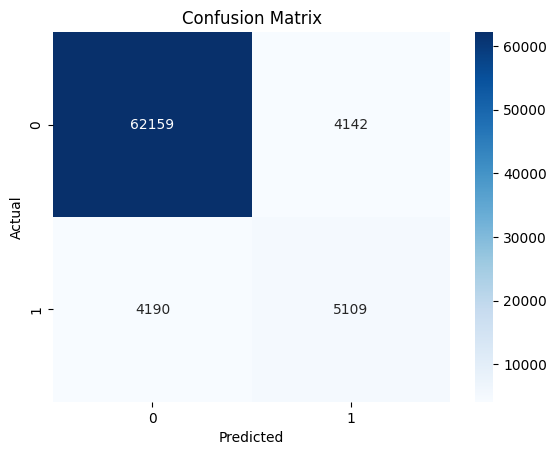

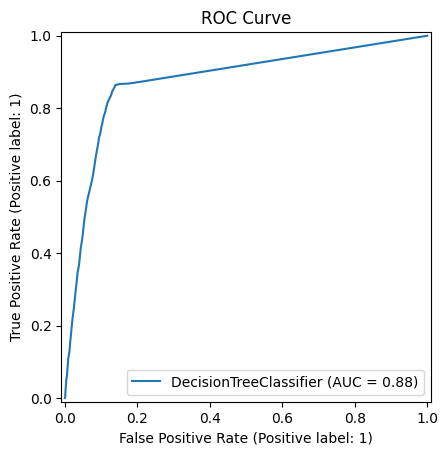

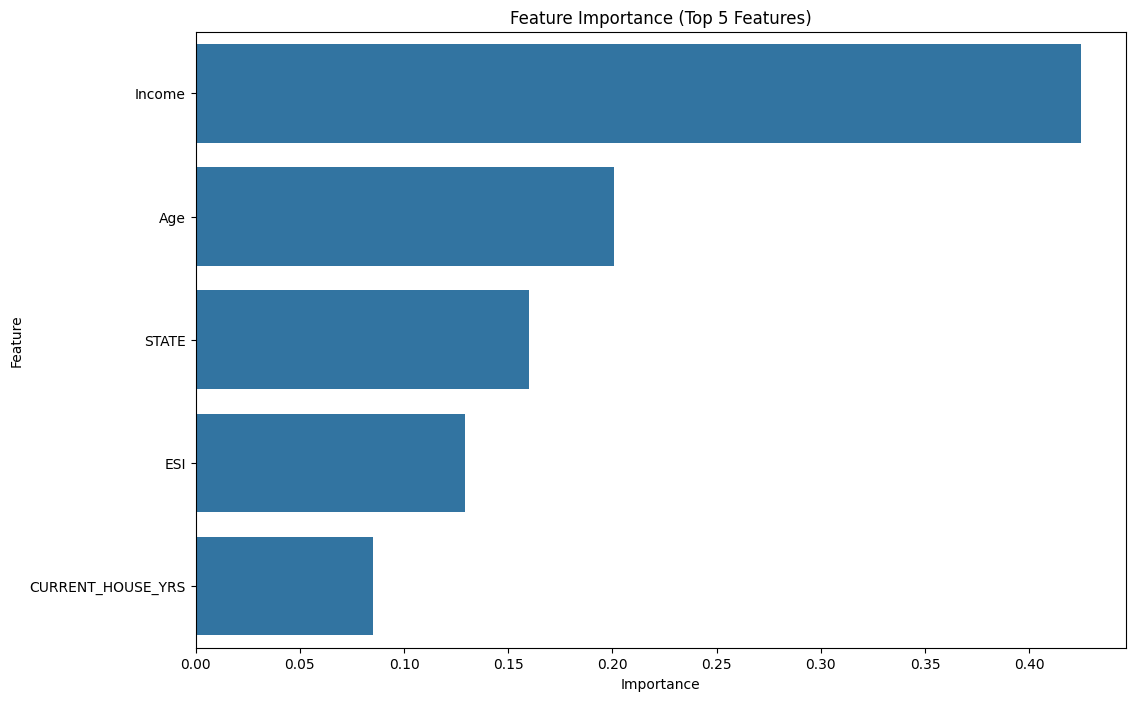

Cross-Validation Accuracy: 0.89
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=2; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=5; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10; total time=   0.2s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_sp

In [12]:
# Decision Tree - Iteration 2

## 2. Load Dataset
data = pd.read_csv('cleanLoanData.csv')

## 3. Preprocessing
# Checking for missing values
print(data.isnull().sum())

# Encoding 'STATE' feature using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['STATE'] = label_encoder.fit_transform(data['STATE'])

# Encoding other categorical variables
data = pd.get_dummies(data, drop_first=True)

# Selecting Top 5 Important Features
top_features = ['Income', 'Age', 'STATE', 'CURRENT_HOUSE_YRS', 'ESI']
X = data[top_features]
y = data['Risk_Flag']

## 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## 5. Hyperparameter Tuning with GridSearchCV
param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='roc_auc',
                           verbose=2,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

# Best Parameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

## 6. Model Training with Best Parameters
model = DecisionTreeClassifier(**best_params, random_state=42)
model.fit(X_train, y_train)

## 7. Model Evaluation
# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title('ROC Curve')
plt.show()

# Feature Importance
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature')
plt.title('Feature Importance (Top 5 Features)')
plt.show()

## 8. Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.2f}")


    Income  Age  Experience  Married.Single  House_Ownership  Car_Ownership  \
0  1303834   23           3               0                1              0   
1  7574516   40          10               0                1              0   
2  3991815   66           4               1                1              0   
3  6256451   41           2               0                1              1   
4  5768871   47          11               0                1              0   

            Profession           STATE  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  \
0  Mechanical_engineer  Madhya_Pradesh                3                 13   
1   Software_Developer     Maharashtra                9                 13   
2     Technical_writer          Kerala                4                 10   
3   Software_Developer          Odisha                2                 12   
4        Civil_servant      Tamil_Nadu                3                 14   

   ...  ProfessionScientist ProfessionSecretary Professi

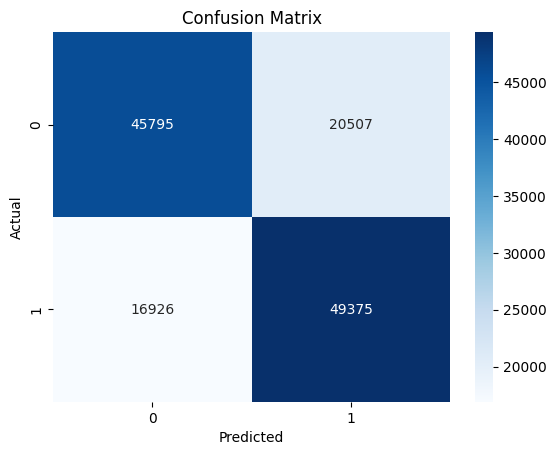

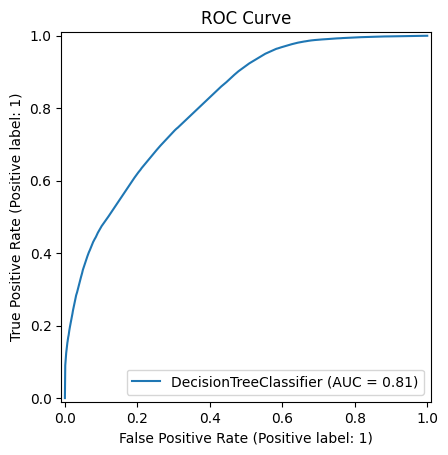

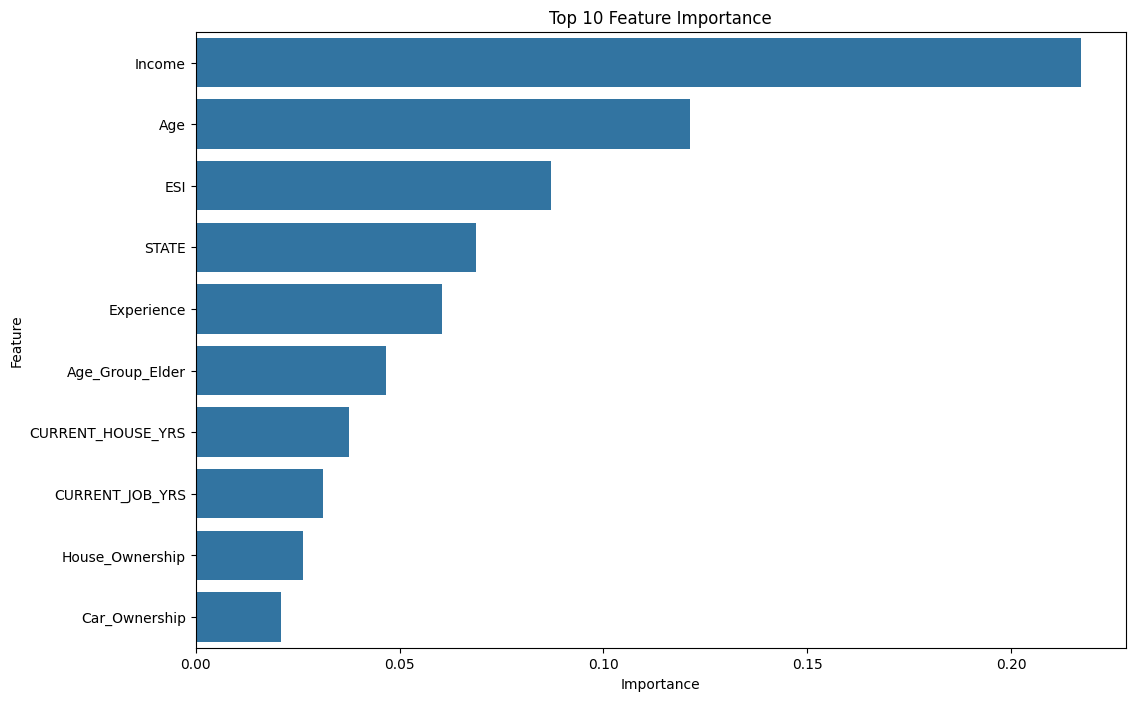

Cross-Validation Accuracy: 0.69
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5; total time=   1.7s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2; total time=   1.2s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   1.1s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=2; total time=   1.2s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=5; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   2.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   2.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2; total time=   2.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10; total time=   2.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5; total time=   2.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10; total time=   2.0s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_spl

In [6]:
# Decision Tree - Iteration 3

## 1. Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load Dataset
data = pd.read_csv('cleanLoanData.csv')
print(data.head())

## 3. Preprocessing
# Checking for missing values
print(data.isnull().sum())

# Encoding 'STATE' feature using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['STATE'] = label_encoder.fit_transform(data['STATE'])

# Encoding other categorical variables
data = pd.get_dummies(data, drop_first=True)

# Splitting Features and Target
X = data.drop('Risk_Flag', axis=1)
y = data['Risk_Flag']

## 4. Handling Class Imbalance
# Using SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

## 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

## 6. Model Training
# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='roc_auc',
                           verbose=2,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

# Best Parameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Training Final Model
model = DecisionTreeClassifier(**best_params, random_state=42)
model.fit(X_train, y_train)

## 7. Model Evaluation
# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title('ROC Curve')
plt.show()

# Feature Importance
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance_df.head(10), x='Importance', y='Feature')
plt.title('Top 10 Feature Importance')
plt.show()

## 8. Cross-Validation
cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.2f}")


Income                             0
Age                                0
Experience                         0
Married.Single                     0
House_Ownership                    0
                                  ..
ProfessionSurveyor                 0
ProfessionTechnical_writer         0
ProfessionTechnician               0
ProfessionTechnology_specialist    0
ProfessionWeb_designer             0
Length: 65, dtype: int64
Accuracy: 0.90
Precision: 0.60
Recall: 0.54
F1 Score: 0.57
ROC AUC: 0.94


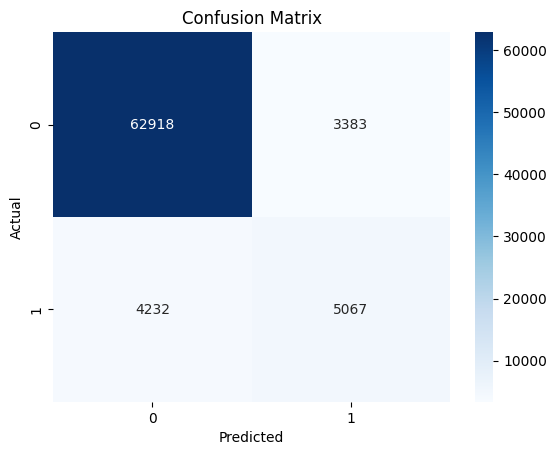

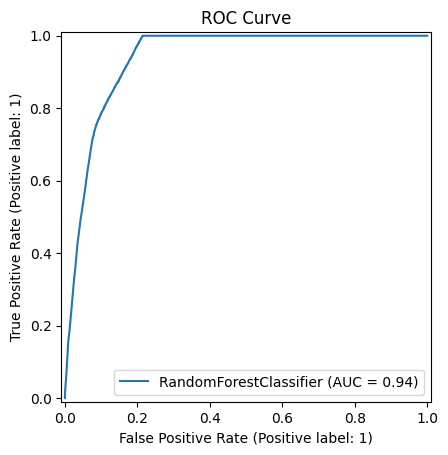

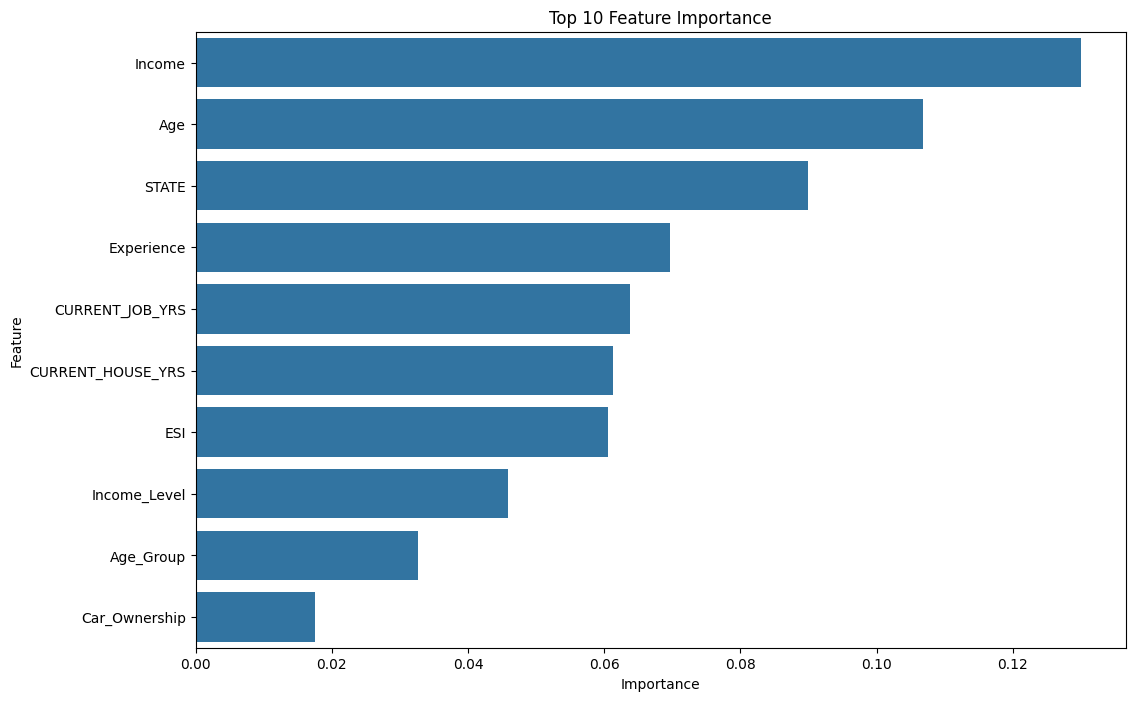

Cross-Validation Accuracy: 0.90


In [8]:
# Random Forest - Iteration 1

## 1. Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load Dataset
data = pd.read_csv('cleanLoanData.csv')

## 3. Preprocessing
# Checking for missing values
print(data.isnull().sum())

# Encoding 'STATE' feature using Label Encoding
label_encoder = LabelEncoder()
data['STATE'] = label_encoder.fit_transform(data['STATE'])

# Encoding 'Income_Level' and 'Age_Group' using Label Encoding
for col in ['Income_Level', 'Age_Group']:
    data[col] = label_encoder.fit_transform(data[col])

# Encoding other categorical variables (if any) using One-Hot Encoding
data = pd.get_dummies(data, drop_first=True)

# Splitting Features and Target
X = data.drop('Risk_Flag', axis=1)
y = data['Risk_Flag']

## 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## 5. Model Training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

## 6. Model Evaluation
# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title('ROC Curve')
plt.show()

# Feature Importance
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance_df.head(10), x='Importance', y='Feature')
plt.title('Top 10 Feature Importance')
plt.show()

## 7. Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.2f}")


Income                             0
Age                                0
Experience                         0
Married.Single                     0
House_Ownership                    0
                                  ..
ProfessionSurveyor                 0
ProfessionTechnical_writer         0
ProfessionTechnician               0
ProfessionTechnology_specialist    0
ProfessionWeb_designer             0
Length: 65, dtype: int64
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy: 0.88
Precision: 0.74
Recall: 0.05
F1 Score: 0.09
ROC AUC: 0.92


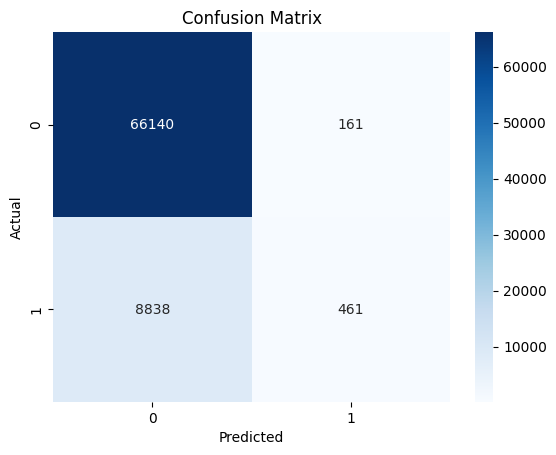

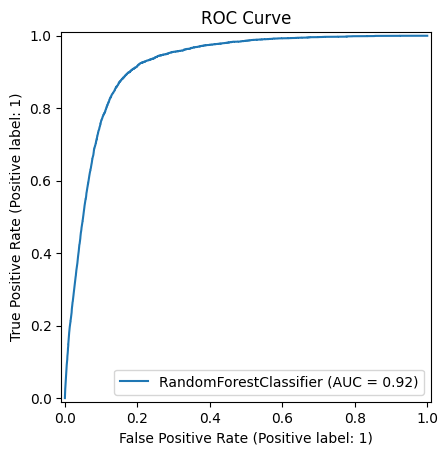

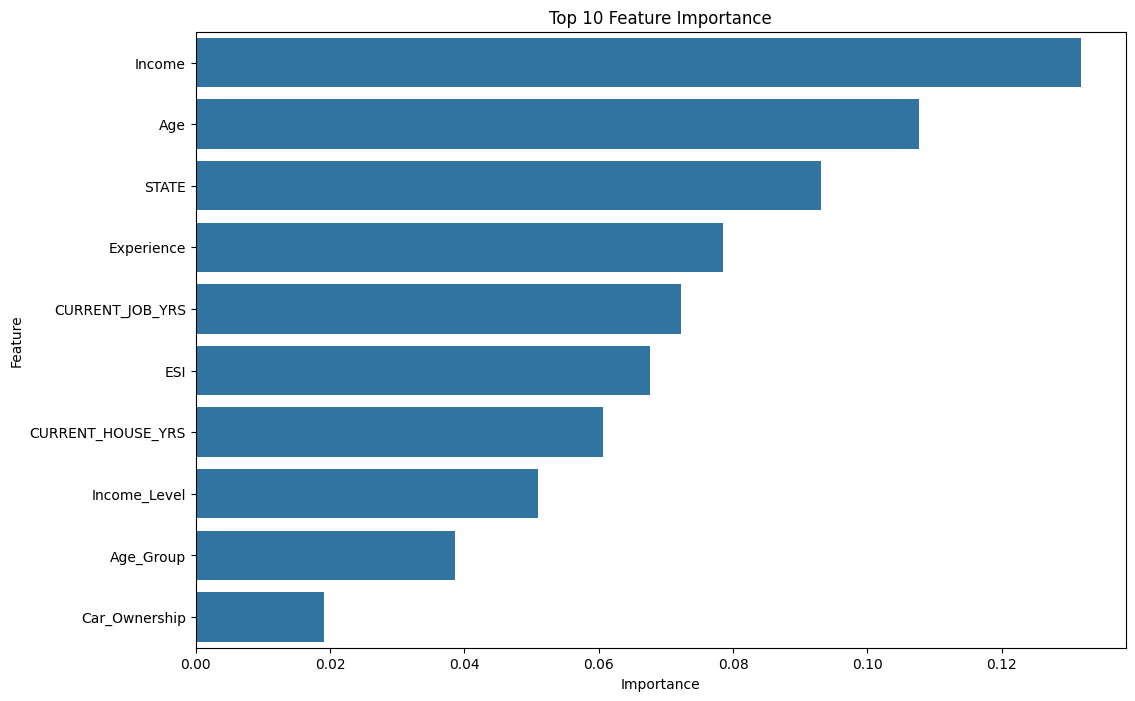

Cross-Validation Accuracy: 0.88


In [10]:
# Random Forest - Iteration 2

## 1. Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load Dataset
data = pd.read_csv('cleanLoanData.csv')

## 3. Preprocessing
# Checking for missing values
print(data.isnull().sum())

# Encoding 'STATE' feature using Label Encoding
label_encoder = LabelEncoder()
data['STATE'] = label_encoder.fit_transform(data['STATE'])

# Encoding 'Income_Level' and 'Age_Group' using Label Encoding
for col in ['Income_Level', 'Age_Group']:
    data[col] = label_encoder.fit_transform(data[col])

# Encoding other categorical variables (if any) using One-Hot Encoding
data = pd.get_dummies(data, drop_first=True)

# Splitting Features and Target
X = data.drop('Risk_Flag', axis=1)
y = data['Risk_Flag']

## 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## 5. Model Training with Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200],  # Number of trees
    'max_depth': [10, 20],       # Depth of trees
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,  # Fewer folds to reduce computation time
                           scoring='roc_auc',
                           verbose=2,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

# Best Parameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Training Final Model
model = RandomForestClassifier(**best_params, random_state=42)
model.fit(X_train, y_train)

## 6. Model Evaluation
# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title('ROC Curve')
plt.show()

# Feature Importance
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance_df.head(10), x='Importance', y='Feature')
plt.title('Top 10 Feature Importance')
plt.show()

## 7. Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=3, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.2f}")


Income                             0
Age                                0
Experience                         0
Married.Single                     0
House_Ownership                    0
                                  ..
ProfessionSurveyor                 0
ProfessionTechnical_writer         0
ProfessionTechnician               0
ProfessionTechnology_specialist    0
ProfessionWeb_designer             0
Length: 65, dtype: int64
Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   6.6s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   6.3s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   6.6s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   6.6s
[CV] END

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   6.8s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  13.2s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   6.6s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  13.5s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   6.9s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   7.3s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  15.0s
[CV] END class_weight=balanced, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  32.1s
[CV] END

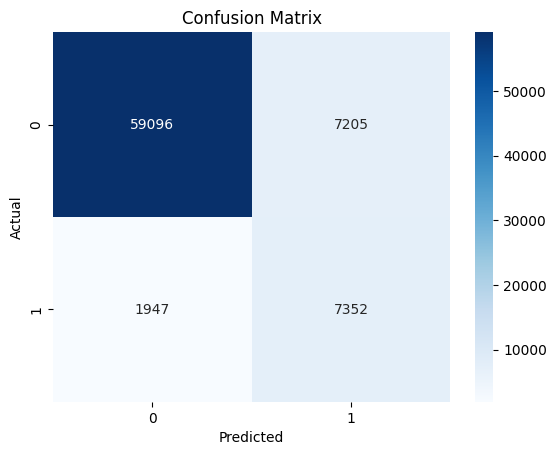

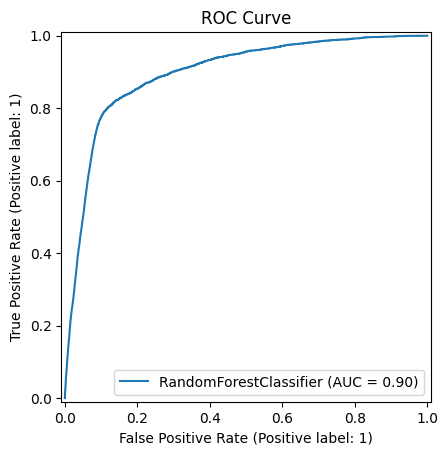

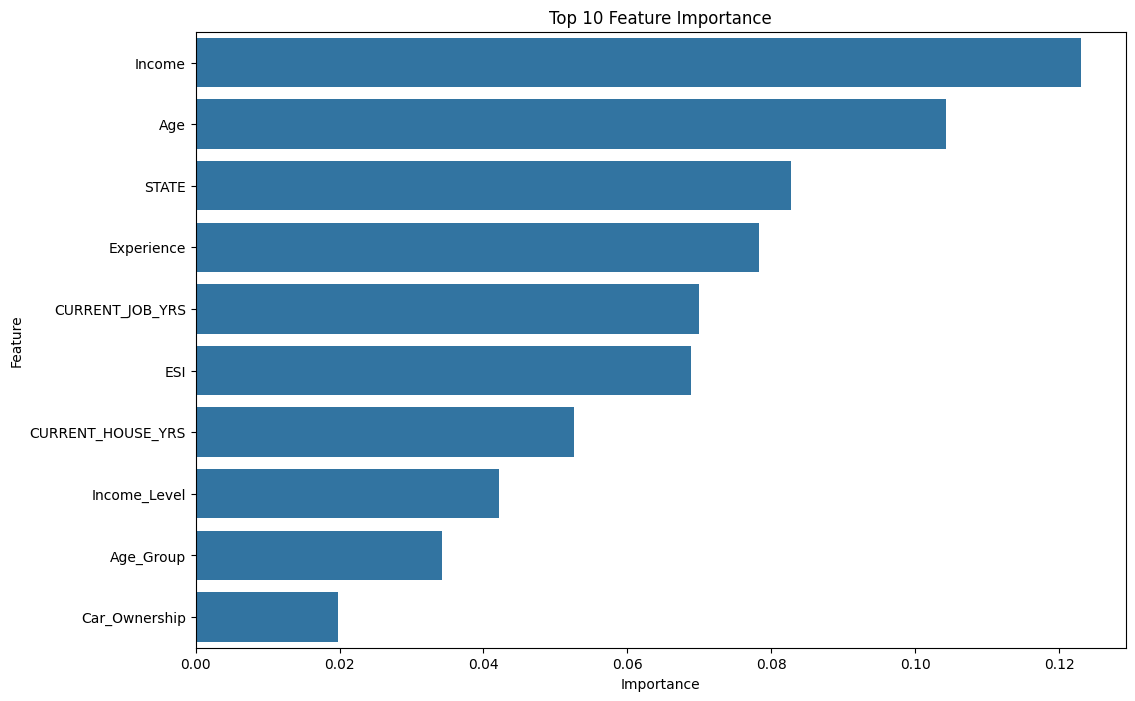

Cross-Validation Recall: 0.77


In [12]:
# Random Forest - Iteration 3

## 1. Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load Dataset
data = pd.read_csv('cleanLoanData.csv')

## 3. Preprocessing
# Checking for missing values
print(data.isnull().sum())

# Encoding 'STATE' feature using Label Encoding
label_encoder = LabelEncoder()
data['STATE'] = label_encoder.fit_transform(data['STATE'])

# Encoding 'Income_Level' and 'Age_Group' using Label Encoding
for col in ['Income_Level', 'Age_Group']:
    data[col] = label_encoder.fit_transform(data[col])

# Encoding other categorical variables (if any) using One-Hot Encoding
data = pd.get_dummies(data, drop_first=True)

# Splitting Features and Target
X = data.drop('Risk_Flag', axis=1)
y = data['Risk_Flag']

## 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## 5. Model Training with Hyperparameter Tuning and Class Weight Adjustment
param_grid = {
    'n_estimators': [100, 200],  # Number of trees
    'max_depth': [10, 20, None],  # Depth of trees
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,  # Fewer folds to reduce computation time
                           scoring='recall',
                           verbose=2,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

# Best Parameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Training Final Model
model = RandomForestClassifier(**best_params, random_state=42)
model.fit(X_train, y_train)

## 6. Model Evaluation
# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title('ROC Curve')
plt.show()

# Feature Importance
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance_df.head(10), x='Importance', y='Feature')
plt.title('Top 10 Feature Importance')
plt.show()

## 7. Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=3, scoring='recall')
print(f"Cross-Validation Recall: {np.mean(cv_scores):.2f}")
